# **MODELADO DE TÓPICOS**
Evaluación de métodos de identificación de tópicos y etiquetado de los datos con el modelo seleccionado

# **CONFIGURACIÓN DEL ENTORNO**

##**1. Conexión a drive :** 
Todo el modelado de tópicos se realizó usando conexiones con drive en el ambiente de google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Instalación de librerías :** 
Instalación de librerías que no estan instaladas por default en Colab

In [ ]:
!pip install pyLDAvis
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**3. Importar librerías :** 
Importar librerías necesarias para el modelado de tópicos

In [ ]:
# 1. Tratamiento y visualización de datos
# ==============================================================================
import pandas as pd  #Preparación y análisis de los datos
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Modelado y evaluación de tópicos
# ==============================================================================
##LDA
from gensim import corpora, models
## NMF
from sklearn.decomposition import NMF
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
##PCA
from sklearn.decomposition import PCA
import pyLDAvis
import pyLDAvis.gensim as gensimvis



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##**4. Lectura de datos preprocesados (ZONA PLATA):** 
Datos limpios obtenidos en el preprocesamiento

**Datos para el modelo LDA**

Cargamos datos preprocesados de la Zona plata para el analisis de tópicos. Documento de nombre list_tokens

In [ ]:
lista_tokens=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/list_tokens.csv',)
print(type(lista_tokens))
lista_tokens.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>


tokens
0  ['tardesl', 'escribir', 'presente', 'correo', ...
1  ['pago', 'factura', 'ver', 'opcion', 'movimien...
2  ['ingenicorp', '6', 'solo', 'contacto', 'corre...
3  ['escribir', 'presente', 'correo', 'notificarl...
4  ['consulta', 'resuelto', 'mayorio', 'cosa', 'i...

In [ ]:
list_tokens = lista_tokens.values.tolist()
print(type(list_tokens))
#list_tokens

<class 'list'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Datos para el modelo NMF**

In [ ]:
datos_preprocesados=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/datos_preprocesados.csv',)
datos_preprocesados.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Autor   
0  Body_ from Elizabeth Guisado T. _afrodita_8521...  \
1  Body_ from Gustavo Virgilio Olazabal Mendoza _...   
2  Body_ from Carlos Santa Cruz Davinson _csantac...   
3  Body_ from Renato Urbina _renatoramosborjas@gm...   
4  Body_ from Hugo Villanueva Castillo _villanuev...   

                                           contenido        Usuario   
0  Buenas tardes.Les escribo el presente correo p...  Inversionista  \
1  Buenas tardes,Sobre este pago de factura, veo ...  Inversionista   
2  Hola,\n\nIngenicorp SAC (20603517726).\n\nPor ...  Inversionista   
3  Buenas tardes.\n\nLes escribo el presente corr...  Inversionista   
4  La consulta fue resuelta en su mayoría, entre ...  Inversionista   

                                    tokens_Contenido   
0  ['tardesl', 'escribir', 'presente', 'correo', ...  \
1  ['pago', 'factura', 'ver', 'opcion', 'movimien...   
2  ['ingenicorp', '6', 'solo', 'contacto', 'corre...   
3  ['escribir', 'presente', 'correo', 'notificarl...   
4  ['consulta', 'resuelto', 'mayorio', 'cosa', 'i...   

                                    corpus_Contenido  num_caracteres   
0  tardesl escribir presente correo notificarl pr...             208  \
1  pago factura ver opcion movimiento pago 32250 ...             696   
2  ingenicorp 6 solo contacto correo whatsapp lin...            1722   
3  escribir presente correo notificarl problema i...             194   
4  consulta resuelto mayorio cosa indicar hacer a...             677   

   num_palabras  
0            27  
1            95  
2           214  
3            26  
4            80

# **MODELADO DE TÓPICOS**

## **Método 1: LDA (Latent Dirichlet Allocation)**: probabilistico

**Paso 1:** Crear un diccionario de la lista de tokens que se obtuvo en el preprocesamiento

In [ ]:
dictionary = corpora.Dictionary(list_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Paso 2:** Crear un bag-of-words como representación del corpus. Se usa la técnica BOW (Bag-of-Words) para representar texto como vectores de frecuencia de palabras.

In [ ]:
# doc2bow es una función que convierte un documento de texto en una lista de tuplas, donde cada tupla contiene un índice de palabra y su frecuencia en el documento.
bow_corpus = [dictionary.doc2bow(tokens) for tokens in list_tokens]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Paso 3:** Entrenar el modelo de LDA: luego de ver un solapamiento se definieron 6 tópicos.

In [ ]:
# Número de tópicos definido como hiper parámetro
num_topics = 4
# definición de tópicos con LDA
lda_model = models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics) # se puede usar otros hiperparámetros?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tópicos resultantes
for topic in lda_model.print_topics():
    print(topic)

(0, '0.005*"[]" + 0.002*"[\'google\', \'nuevo\', \'inicio\', \'sesion\', \'mac\', \'contacto\', \'detectado\', \'nuevo\', \'inicio\', \'sesion\', \'contar\', \'google\', \'dispositivo\', \'mac\', \'ser\', \'necesario\', \'haga\', \'contrario\', \'ayudarer\', \'proteger\', \'cuenta\', \'comprobar\', \'actividad\', \'tambien\', \'poder\', \'ver\', \'todo\', \'actividad\', \'seguridad\', \'myaccountgooglecomnotifications\', \'enviado\', \'correo\', \'electronico\', \'informartar\', \'cambio\', \'importante\', \'contar\', \'servicio\', \'google\', \'google\', \'llc\', \'1600\', \'amphitheatre\', \'parkway\', \'mountain\', \'view\', \'ca\', \'94043\', \'usar\']" + 0.001*"[\'tal\', \'invito\', \'losprobadorescom\', \'portal\', \'podra\', \'encontrar\', \'profesional\', \'remoto\', \'estable\', \'experimentado\', \'proyecto\', \'bilingu\', \'registra\', \'crea\', \'vacante\', \'empleo\', \'indiques\', \'skill\', \'requier\', \'ejemplo\', \'java\', \'ano\', \'experienciagoogle\', \'analytics\'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Paso 4:** Visualización de tópicos para evaluar solapamiento de tópicos y si se requiere reducción de dimensionalidad

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


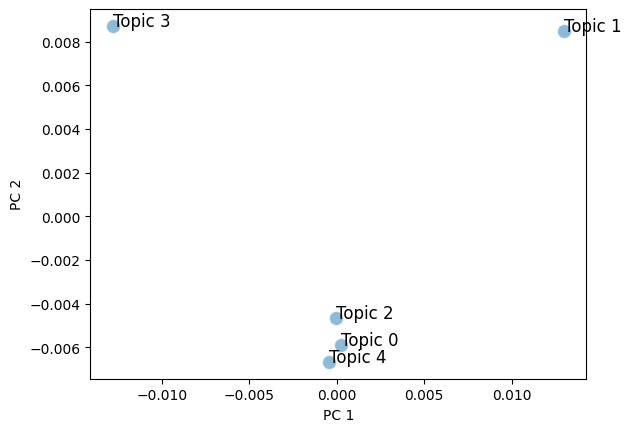

In [ ]:
#Ajuste de datos para Visualizaicón de tópicos pyLDAvis
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

# Obtención de tópicos en el corpus
topics = lda_model[bow_corpus]

#Extracción de tópicos dominantes y el porcentaje de contribución a cada documento
dominant_topics = []
for i, doc in enumerate(topics):
    topic = sorted(doc, key=lambda x: x[1], reverse=True)[0]
    dominant_topics.append((i, topic[0], topic[1]))
df_dominant_topics = pd.DataFrame(dominant_topics, columns=['Doc_Id', 'Dominant_Topic', 'Perc_Contribution'])

#Matriz de tópicos
topic_term_matrix = lda_model.get_topics()

# Generación de lista de tópicos
topic_names = ['Topic ' + str(i) for i in range(num_topics)]

# Análisis de componentes principales PCA con los tópicos para reducción de dimencionalidad y visualización bidimensional
pca = PCA(n_components=2)
topic_term_matrix_2d = pca.fit_transform(topic_term_matrix)

# Visualización de tópicos y componentes principales
sns.scatterplot(x=topic_term_matrix_2d[:, 0], y=topic_term_matrix_2d[:, 1], s=100, alpha=0.5)
for i, topic_name in enumerate(topic_names):
    plt.text(topic_term_matrix_2d[i, 0], topic_term_matrix_2d[i, 1], topic_name, fontsize=12)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## **Método 2: NMF (Non-negative Matrix Factorization):**  Método multiplicativo


**Paso 1:** Definición de la matriz númerica a partir del corpus

In [ ]:
#Importar Diccionario nltk.corpus
stop_words_nltk = list(stopwords.words('spanish'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = datos_preprocesados['corpus_Contenido'].values.astype('U').tolist()
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words_nltk)
#matriz de valores TF-IDF
X = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Paso 2:** Entrenar el modelo de NMF: luego de ver un solapamiento se definieron 6 tópicos.

In [44]:
# numero de tópicos hiperparámetros
num_topics = 6 
#NMF
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(n_components=6, random_state=42)

**Paso 3:** Entrenar el modelo de NMF

In [45]:
# Top de palabras a mostrar por tópico
num_top_words = 15 
feature_names = vectorizer.get_feature_names_out()
#Obtención de palabras por tópico
for topic_idx, topic in enumerate(nmf_model.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))



Topic #0:
pago cobranza operación empresa fecha nota proceso factura acuerdo operacion deudor contacto judicial ultimo mes

Topic #1:
empresa superintendencia smv valor registro youtube plataforma oportunidad inversion mercado factoring contenido financiero condición administrado

Topic #2:
pen oferta rendimiento comision operacion exito factura neto monto 000 bruto igv impuesto adelanto tasar

Topic #3:
puja eliminar subasta estimado estimadopor estimad imagepng inversion factura operacion querer compromiso retirar apoyo anular

Topic #4:
poder contacto contar cuenta escribio deposito equipo buen retiro bancario hacer correo pedir activado plataforma

Topic #5:
personal mensaje entidad dato destinatario divulgacion prohibido electronico desear establecido ley correo direccion ejercer supresion


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
topics = nmf_model.transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
dominant_topics = []
for i, doc in enumerate(topics):
    topic = sorted(enumerate(doc), key=lambda x: x[1], reverse=True)[0]
    dominant_topics.append((i, topic[0], topic[1]))
df_dominant_topics = pd.DataFrame(dominant_topics, columns=['Doc_Id', 'Dominant_Topic', 'Perc_Contribution'])
df_dominant_topics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Doc_Id  Dominant_Topic  Perc_Contribution
0       0               4           0.060138
1       1               2           0.264894
2       2               1           0.187045
3       3               4           0.059689
4       4               4           0.080191

**Paso 4:** Visualización de tópicos para evaluar solapamiento de tópicos y si se requiere reducción de dimensionalidad

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


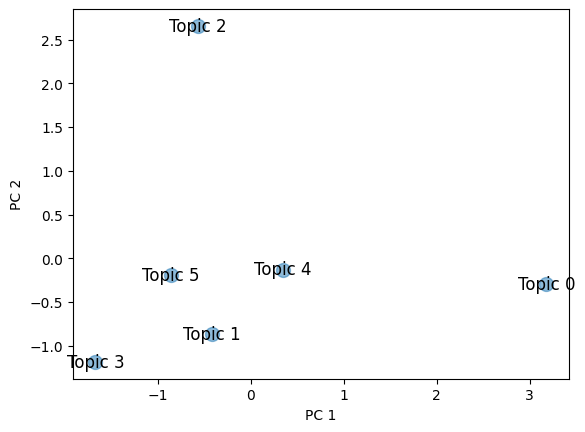

In [48]:
# Get the topic-term matrix
topic_term_matrix = nmf_model.components_

# Apply PCA to reduce the dimensionality of the matrix to 2
pca = PCA(n_components=2)
topic_term_matrix_2d = pca.fit_transform(topic_term_matrix)

# Define the topic labels
topic_labels = ['Topic {}'.format(i) for i in range(num_topics)]

# Plot the principal components and add the topic labels
fig, ax = plt.subplots()
ax.scatter(topic_term_matrix_2d[:, 0], topic_term_matrix_2d[:, 1], s=100, alpha=0.5)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
for i, label in enumerate(topic_labels):
    ax.annotate(label, (topic_term_matrix_2d[i, 0], topic_term_matrix_2d[i, 1]), fontsize=12, ha='center', va='center')
plt.show()

# añadir a DF los tópicos

In [49]:
# assume both dataframes have the same index
df_merged = pd.merge(datos_preprocesados, df_dominant_topics[['Dominant_Topic', 'Perc_Contribution']], left_index=True, right_index=True, how='right')
df_merged.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Autor   
0  Body_ from Elizabeth Guisado T. _afrodita_8521...  \
1  Body_ from Gustavo Virgilio Olazabal Mendoza _...   
2  Body_ from Carlos Santa Cruz Davinson _csantac...   
3  Body_ from Renato Urbina _renatoramosborjas@gm...   
4  Body_ from Hugo Villanueva Castillo _villanuev...   

                                           contenido        Usuario   
0  Buenas tardes.Les escribo el presente correo p...  Inversionista  \
1  Buenas tardes,Sobre este pago de factura, veo ...  Inversionista   
2  Hola,\n\nIngenicorp SAC (20603517726).\n\nPor ...  Inversionista   
3  Buenas tardes.\n\nLes escribo el presente corr...  Inversionista   
4  La consulta fue resuelta en su mayoría, entre ...  Inversionista   

                                    tokens_Contenido   
0  ['tardesl', 'escribir', 'presente', 'correo', ...  \
1  ['pago', 'factura', 'ver', 'opcion', 'movimien...   
2  ['ingenicorp', '6', 'solo', 'contacto', 'corre...   
3  ['escribir', 'presente', 'correo', 'notificarl...   
4  ['consulta', 'resuelto', 'mayorio', 'cosa', 'i...   

                                    corpus_Contenido  num_caracteres   
0  tardesl escribir presente correo notificarl pr...             208  \
1  pago factura ver opcion movimiento pago 32250 ...             696   
2  ingenicorp 6 solo contacto correo whatsapp lin...            1722   
3  escribir presente correo notificarl problema i...             194   
4  consulta resuelto mayorio cosa indicar hacer a...             677   

   num_palabras  Dominant_Topic  Perc_Contribution  
0            27               4           0.060138  
1            95               2           0.264894  
2           214               1           0.187045  
3            26               4           0.059689  
4            80               4           0.080191

Contar numero de clases

In [50]:
print(df_merged['Dominant_Topic'].value_counts())

Dominant_Topic
4    2509
0    1821
1     560
2     467
5     296
3     167
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Guardar el DF con los tópicos

In [51]:
df_merged.to_csv('/content/drive/MyDrive/EAFIT/Semestre 3/Minería para Grandes volúmenes de datos/Proyecto/proyecto de minería/Jobs/Repositorio de analitica/Data/3. Oro/topicos.csv', index=False)
#df_merged.to_csv('/content/drive/MyDrive/Colab Notebooks/correos_ZIP/df_topics_peru.csv', header = True, index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_clasification = df_merged[['corpus_Contenido', 'Dominant_Topic']]
df_clasification.to_csv('/content/drive/MyDrive/EAFIT/Semestre 3/Minería para Grandes volúmenes de datos/Proyecto/proyecto de minería/Jobs/Repositorio de analitica/Data/3. Oro/df_etiquetado.csv', index=False)
df_clasification

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


corpus_Contenido  Dominant_Topic
0     tardesl escribir presente correo notificarl pr...               4
1     pago factura ver opcion movimiento pago 32250 ...               2
2     ingenicorp 6 solo contacto correo whatsapp lin...               1
3     escribir presente correo notificarl problema i...               4
4     consulta resuelto mayorio cosa indicar hacer a...               4
...                                                 ...             ...
5815  necesitar respuesta caso contrario tendre hace...               0
5816  necesitar respuesta caso contrario tendre hace...               0
5817  estimado esperar correo encontrar bien proposi...               4
5818  good morning hope finds well wanted reach curr...               5
5819  respuesta estar hacer cambio plataforma estari...               4

[5820 rows x 2 columns]